In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving combined.csv to combined.csv


In [ ]:
import io
fire  = pd.read_csv(io.BytesIO(uploaded['combined.csv']))
fire.head(5)

,date,county,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,FIRE_NAME,CAUSE,lat,long,GIS_ACRES
0,2008-07,Santa Barbara County,89.129032,59.709677,80.548387,0.0,41.451613,7.354839,0.0,72.937634,34.079570,0.010000,13.164516,no_fire,0.0,34.54,-120.04,0.000000
1,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,SERPENTINE,1.0,38.18,-120.56,176.763400
2,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,POOL 2 - MAIN,10.0,38.18,-120.56,73.444778
3,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,FRENCH,14.0,38.18,-120.56,101.074150
4,2008-07,Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,EVANS,6.0,38.18,-120.56,103.968050


In [ ]:
fire = fire.drop(columns=['FIRE_NAME', 'lat', 'long'])

In [ ]:
fire['date'] = [x.split('-') for x in fire['date']]

In [ ]:
fire['year'] = [int(x[0]) for x in fire['date']]

In [ ]:
fire['month'] = [int(x[1]) for x in fire['date']]

In [ ]:
fire.shape

(10988, 17)

In [ ]:
fire_1 = pd.get_dummies(fire, columns=['month'])

In [ ]:
fire_1.head()

,date,county,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,"[2008, 07]",Santa Barbara County,89.129032,59.709677,80.548387,0.0,41.451613,7.354839,0.0,72.937634,...,0,0,0,0,1,0,0,0,0,0
1,"[2008, 07]",Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,...,0,0,0,0,1,0,0,0,0,0
2,"[2008, 07]",Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,...,0,0,0,0,1,0,0,0,0,0
3,"[2008, 07]",Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,...,0,0,0,0,1,0,0,0,0,0
4,"[2008, 07]",Calaveras County,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
fire_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10988 entries, 0 to 10987
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         10988 non-null  object 
 1   county       10988 non-null  object 
 2   maxtempF     10988 non-null  float64
 3   mintempF     10988 non-null  float64
 4   avgtempF     10988 non-null  float64
 5   totalSnow    10988 non-null  float64
 6   humid        10988 non-null  float64
 7   wind         10988 non-null  float64
 8   precip       10988 non-null  float64
 9   q_avgtempF   10988 non-null  float64
 10  q_avghumid   10988 non-null  float64
 11  q_sumprecip  10988 non-null  float64
 12  sunHour      10988 non-null  float64
 13  CAUSE        10988 non-null  float64
 14  GIS_ACRES    10988 non-null  float64
 15  year         10988 non-null  int64  
 16  month_1      10988 non-null  uint8  
 17  month_2      10988 non-null  uint8  
 18  month_3      10988 non-null  uint8  
 19  mont

In [ ]:
fire_1.describe()

,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,1.098800e+04,...,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000,10988.000000
mean,72.789618,49.036346,64.676692,0.087918,54.408352,5.583294,0.072370,61.760095,57.089738,2.660346e-01,...,0.063524,0.064980,0.077630,0.103477,0.131416,0.114398,0.096196,0.078813,0.071715,0.070258
std,15.735935,11.425170,14.635490,0.420449,16.926551,1.514516,0.133537,13.136071,15.399669,3.498030e-01,...,0.243914,0.246502,0.267601,0.304594,0.337870,0.318308,0.294873,0.269459,0.258026,0.255594
min,26.214286,0.642857,19.483871,0.000000,10.466667,2.354839,0.000000,22.195853,12.664516,-4.440892e-16,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.056452,42.123560,53.870968,0.000000,41.165323,4.533333,0.003226,52.827688,46.095699,4.247312e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.951075,49.633333,65.290323,0.000000,54.098387,5.354839,0.020000,61.135663,57.857168,1.354839e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,85.032258,56.677419,75.900806,0.000000,67.903226,6.354839,0.080645,71.280824,69.275627,3.442684e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,110.935484,88.935484,102.612903,9.229108,95.935484,14.129032,1.748387,100.311470,93.598694,3.619931e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


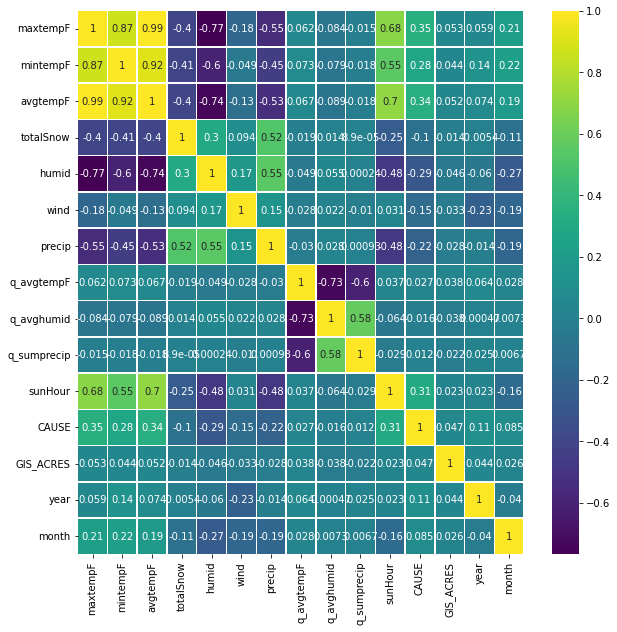

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(fire.corr(),annot=True,cmap='viridis',linewidths=.5)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


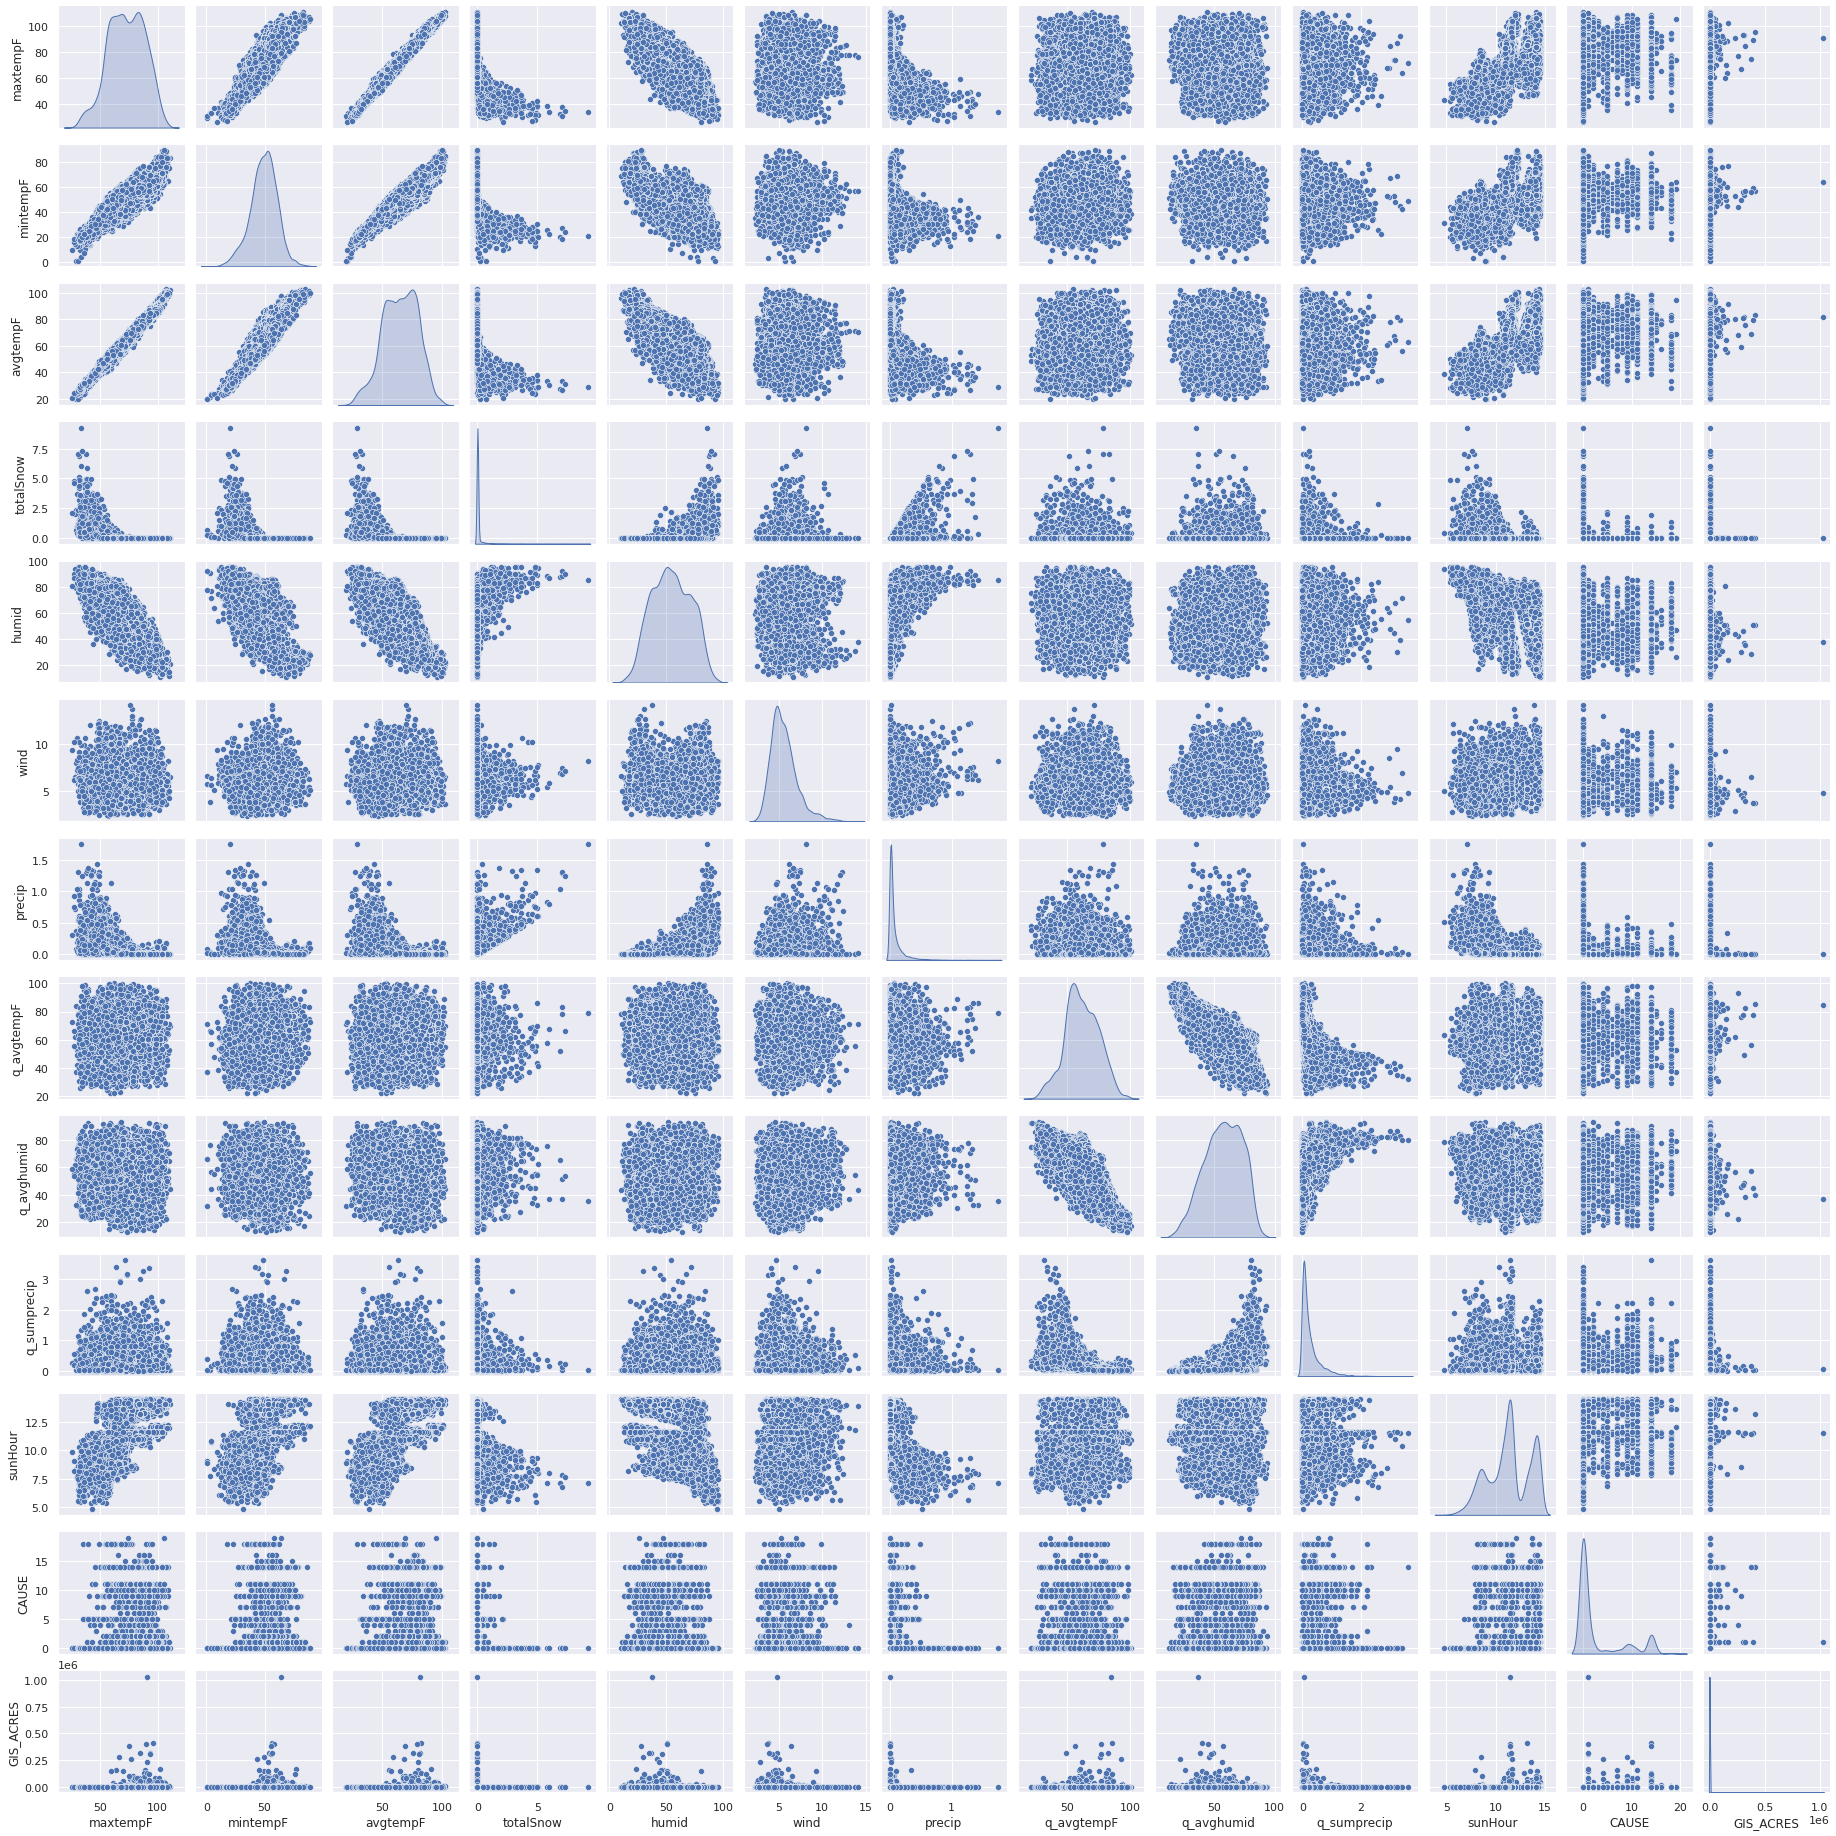

In [ ]:
sns.set()
columns = ['maxtempF','mintempF','avgtempF','totalSnow','humid','wind', 'precip', 'q_avgtempF','q_avghumid','q_sumprecip', 'sunHour','CAUSE', 'GIS_ACRES']
sns.pairplot(fire_1[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

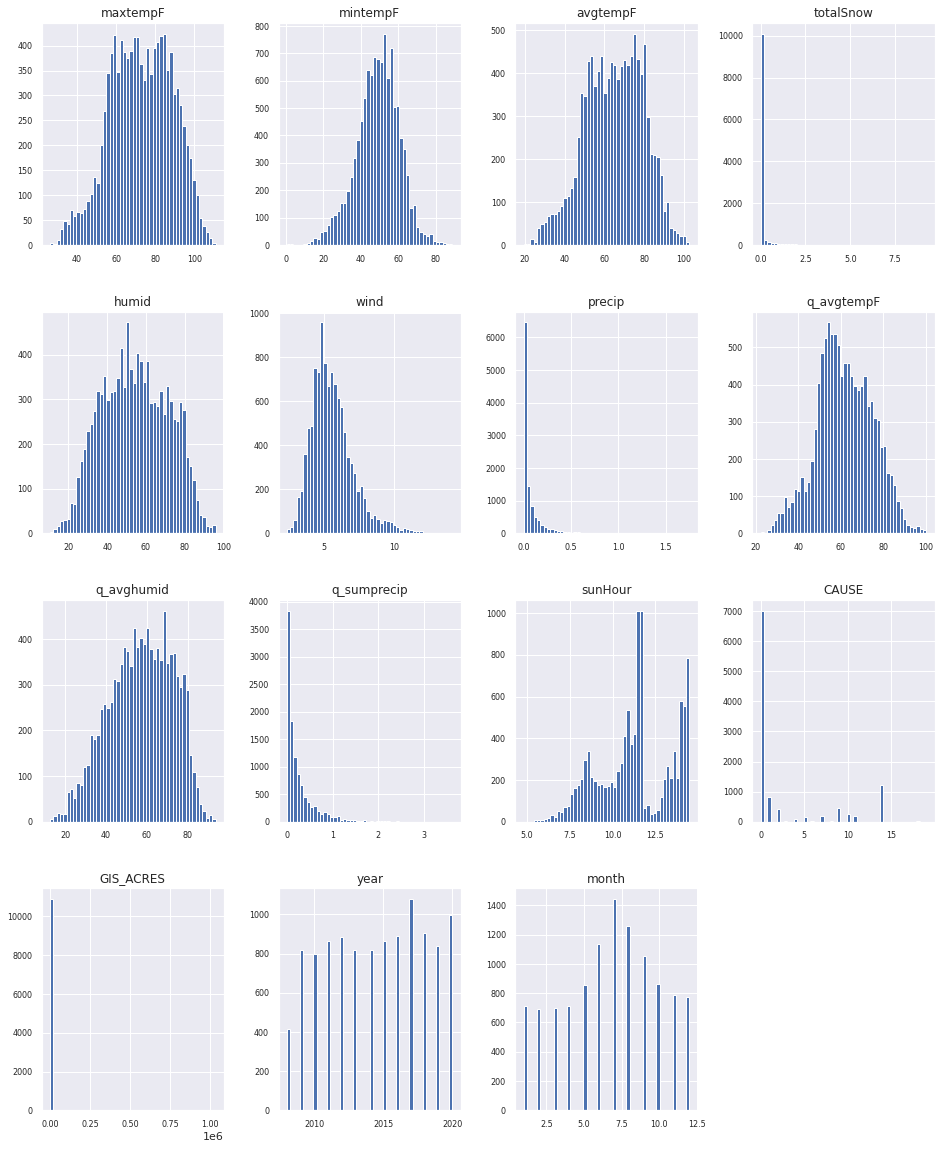

In [ ]:
fire.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

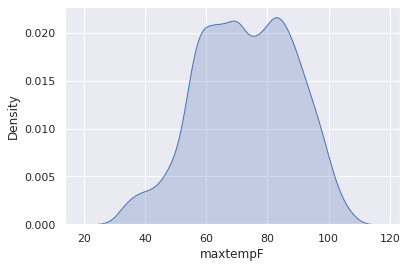

In [ ]:
 sns.kdeplot(fire['maxtempF'], shade=True)


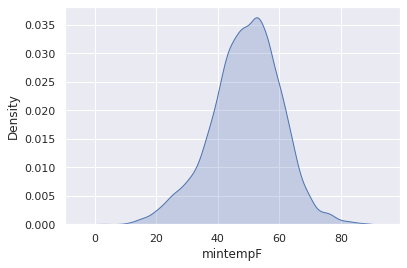

In [ ]:
 sns.kdeplot(fire['mintempF'], shade=True)

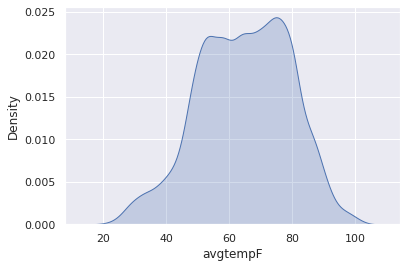

In [ ]:
 sns.kdeplot(fire['avgtempF'], shade=True)

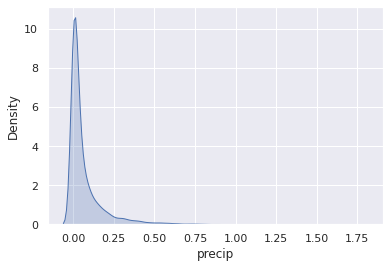

In [ ]:
 sns.kdeplot(fire['precip'], shade=True)

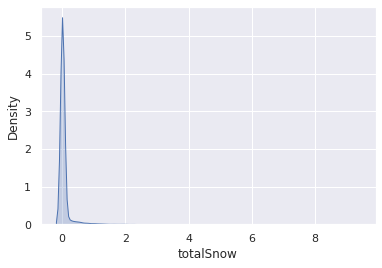

In [ ]:
 sns.kdeplot(fire['totalSnow'], shade=True)

Text(0.5, 0, 'GIS_ACRES')

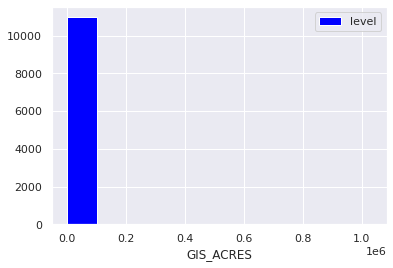

In [ ]:
plt.hist(fire['GIS_ACRES'],color = 'Blue', label = 'level')
plt.legend()
plt.xlabel("GIS_ACRES")

In [ ]:
datanum = fire.select_dtypes(include = ['float64', 'int64'])
datanum.head()


,maxtempF,mintempF,avgtempF,totalSnow,humid,wind,precip,q_avgtempF,q_avghumid,q_sumprecip,sunHour,CAUSE,GIS_ACRES,year,month
0,89.129032,59.709677,80.548387,0.0,41.451613,7.354839,0.0,72.937634,34.079570,0.010000,13.164516,0.0,0.000000,2008,7
1,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,1.0,176.763400,2008,7
2,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,10.0,73.444778,2008,7
3,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,14.0,101.074150,2008,7
4,96.419355,51.290323,87.032258,0.0,33.580645,5.387097,0.0,65.217204,38.434409,0.068065,14.022581,6.0,103.968050,2008,7


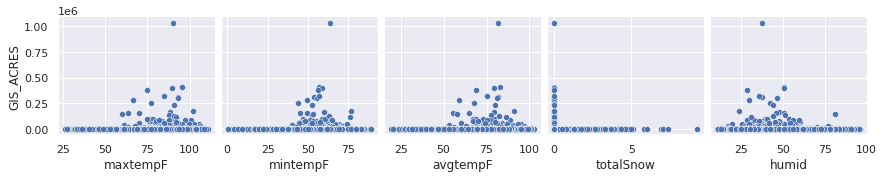

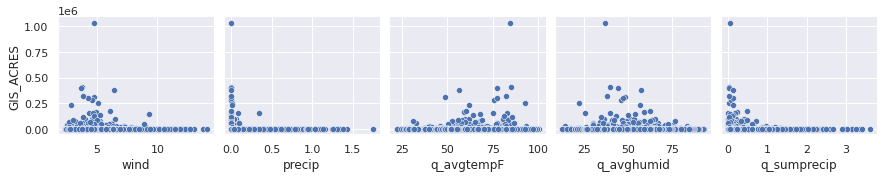

In [ ]:
for i in range(0, len(datanum.columns), 5):
    sns.pairplot(data=datanum,
                x_vars=datanum.columns[i:i+5],
                y_vars=['GIS_ACRES'])

In [ ]:
fire_1['bool'] = (fire_1['GIS_ACRES'] > 0) * 1

In [ ]:
#fire['bool'].value_counts(normalize=True)

In [ ]:

X = fire_1.drop(columns=['GIS_ACRES', 'date', 'q_avgtempF', 'q_avghumid', 'q_sumprecip', 'maxtempF', 'mintempF', 'CAUSE', 'bool', 'county'])
y = fire_1['bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
X_train

,avgtempF,totalSnow,humid,wind,precip,sunHour,year,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
6372,56.857143,0.000000,64.964286,3.892857,0.025000,10.321429,2016,0,1,0,0,0,0,0,0,0,0,0,0
1559,63.266667,0.000000,49.900000,6.233333,0.016667,14.433333,2010,0,0,0,0,0,1,0,0,0,0,0,0
5696,63.483871,0.000000,68.258065,6.935484,0.009677,13.054839,2015,0,0,0,0,1,0,0,0,0,0,0,0
3668,52.866667,0.000000,58.700000,5.300000,0.193333,7.796667,2012,0,0,0,0,0,0,0,0,0,0,1,0
3686,42.366667,1.624672,59.900000,5.766667,0.300000,8.053333,2012,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,62.766667,0.000000,79.433333,8.000000,0.006667,14.183333,2015,0,0,0,0,0,1,0,0,0,0,0,0
5191,68.133333,0.000000,66.900000,3.833333,0.053333,11.276667,2014,0,0,0,0,0,0,0,0,1,0,0,0
5390,54.903226,0.000000,55.322581,5.516129,0.016129,8.274194,2014,0,0,0,0,0,0,0,0,0,0,0,1
860,82.161290,0.000000,39.774194,4.806452,0.000000,13.274194,2009,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print(log_reg.score(X_train, y_train))
log_reg.score(X_test, y_test)

0.7495774281627877


0.7652411282984531

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
knn.score(X_test, y_test)

0.9986997789624236


0.8450106157112527

In [ ]:
rf = RandomForestClassifier(n_estimators=500, max_depth=15)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
rf.score(X_test, y_test)

0.9842673254453257


0.8841370943281771

In [ ]:
rf.feature_importances_

array([0.20762489, 0.01620287, 0.18464576, 0.1341498 , 0.09827082,
       0.21026741, 0.0681018 , 0.00373554, 0.00252922, 0.00254248,
       0.00575547, 0.00734892, 0.00767142, 0.01945733, 0.01095503,
       0.00845067, 0.00635986, 0.00282658, 0.00310416])

In [ ]:
feature_df = pd.DataFrame(rf.feature_importances_, index=X.columns)
feature_df.sort_values(by=0, ascending=False)


,0
sunHour,0.210267
avgtempF,0.207625
humid,0.184646
wind,0.134150
precip,0.098271
year,0.068102
month_7,0.019457
totalSnow,0.016203
month_8,0.010955
month_9,0.008451


In [ ]:
log_pred=log_reg.predict(X_test)
knn_pred=knn.predict(X_test)
rf_pred=rf.predict(X_test)

In [ ]:
pred_df = pd.DataFrame(columns=['log_reg', 'knn', 'rf'])
pred_df['log_reg'] = log_reg.predict(X_test)
pred_df['knn'] = knn.predict(X_test)
pred_df['rf'] = rf.predict(X_test) 
pred_df['ensemble'] = (pred_df.sum(axis=1)/3).round(0)
pred_df.head()

,log_reg,knn,rf,ensemble
0,1,1,1,1.0
1,0,0,0,0.0
2,0,0,0,0.0
3,1,1,1,1.0
4,0,0,0,0.0


In [ ]:
from sklearn import metrics
metrics.accuracy_score(pred_df['ensemble'], y_test)

0.8707916287534122

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2098
           1       0.84      0.84      0.84      1199

    accuracy                           0.88      3297
   macro avg       0.87      0.87      0.87      3297
weighted avg       0.88      0.88      0.88      3297



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,rf_pred)
cm

array([[1907,  191],
       [ 191, 1008]])

In [ ]:
! pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import flask
from flask import Flask, render_template, request
import pickle
import tensorflow as tf
import numpy as np
from flask_ngrok import run_with_ngrok
import warnings
warnings.filterwarnings('ignore')
app = Flask(__name__)
run_with_ngrok(app)
model = tf.keras.models.load_model('/content/sample_data/mnist_train_small.csv')

OSError: ignored

In [ ]:
X = fire_1.drop(columns=['GIS_ACRES', 'date', 'q_avgtempF', 'q_avghumid', 'q_sumprecip', 'maxtempF', 'mintempF', 'CAUSE',  'county'])
y = fire_1['GIS_ACRES']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-2.231122843338899

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

-4.958209848309007